# Clustering Credit Card Users using Hierachical Clustering

The purpose of this project is to see and find the type of CC users. The type will be analyzed by user's characteristic and behaviour in using their CC.

### Preparation
In this part, we import, proceed the raw data until it is ready to use.

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

In [52]:
df = pd.read_csv('dataset-s2.csv')

In [53]:
df.shape

(8950, 18)

In [54]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [55]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In this project, I want to analyze the people according on their purchases, payments, minimum payments, frequency of purchases, and credit limit. Purchases, payments, and minimum payments are the total value, not quantity. The quantity is represented on the frequency attribute. The credit limit is the maximum limit a person can spend with their CC. The bigger the credit value, it means they have bigger balance the first time around.

In [56]:
df = df.drop(columns=['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                      'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                      'CASH_ADVANCE_TRX', 'PURCHASES_TRX',  'PRC_FULL_PAYMENT', 'TENURE'])
df.reset_index(drop=True, inplace=True)

Handle missing values.

In [57]:
df.isnull().sum()
df =df.dropna()

In [58]:
df_idcust = df['CUST_ID']

In [59]:
df = df.drop(columns=['CUST_ID','BALANCE'])
df.reset_index(drop=True, inplace=True)

#### Overal info of ready-dataframe

In [60]:
df.describe()

,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1025.433874,0.496000,4522.091030,1784.478099,864.304943
std,2167.107984,0.401273,3659.240379,2909.810090,2372.566350
min,0.000000,0.000000,50.000000,0.049513,0.019163
25%,43.367500,0.083333,1600.000000,418.559237,169.163545
50%,375.405000,0.500000,3000.000000,896.675701,312.452292
75%,1145.980000,0.916667,6500.000000,1951.142090,825.496463
max,49039.570000,1.000000,30000.000000,50721.483360,76406.207520


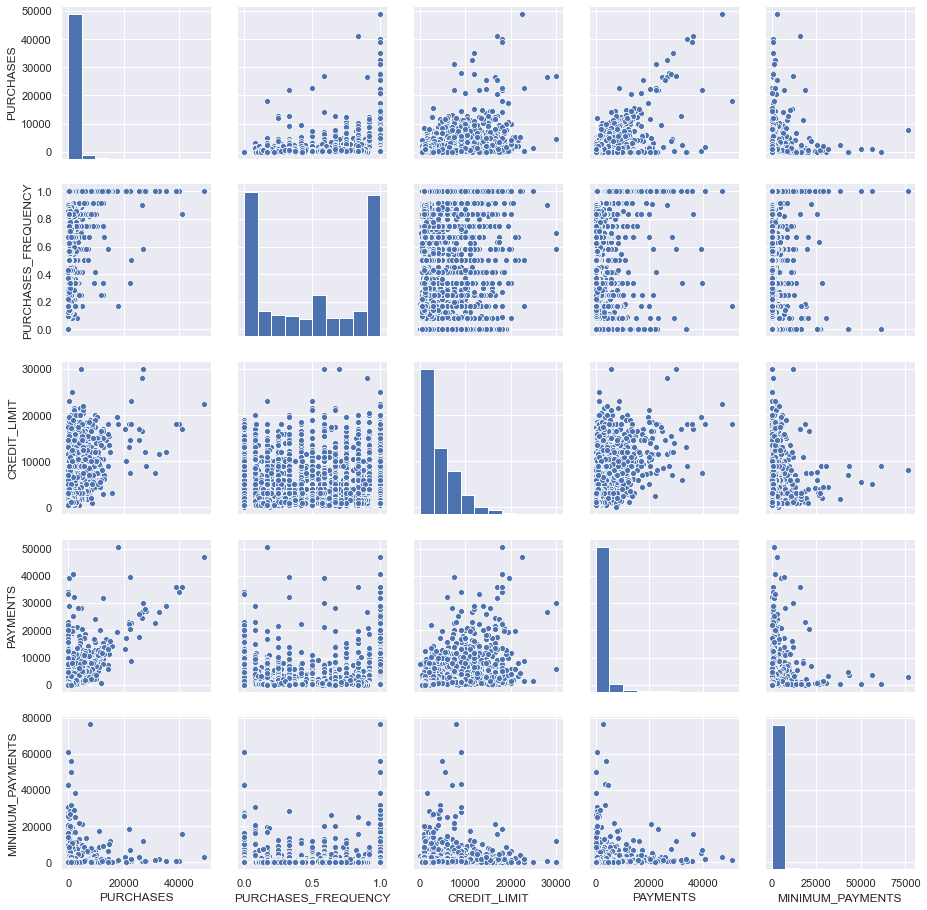

In [61]:
sns.pairplot(df)

### Clustering using Hierachical Clustering

We are going to make the dendogram first to see the overal data.

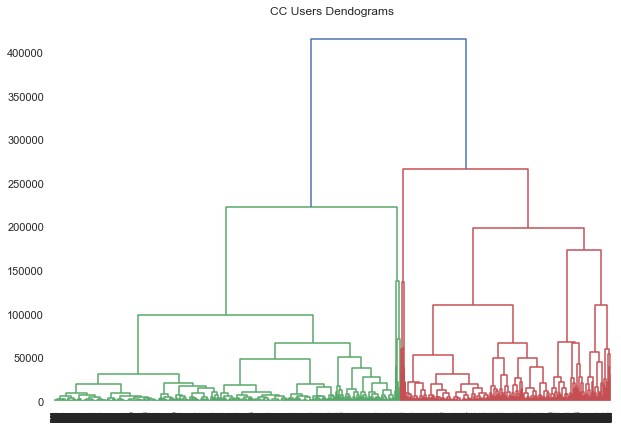

In [63]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("CC Users Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

From the dendogram above, we can see that it divide the data to two major cluster. This is a same result with best k from previous silhoutte score K-means clustering. This time, let's do the clustering as the dendogram said best, 2.

In [64]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_cluster = cluster.fit_predict(df)

So we have two cluster, 0 and 1.

### PCA
Visualizing data with high dimension is hard. We have 5 dimensions, so we have to reduced it to 2 dimensions. It will make it easier to visualize and analyze. I choose to do it with PCA since it will give us the best principal components by its eigen values.

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [66]:
pca = PCA(n_components = 2)
df['x'] = pca.fit_transform(df_scaled)[:,0]
df['y'] = pca.fit_transform(df_scaled)[:,1]

In [67]:
result_df = pd.DataFrame()

In [68]:
result_df['CUST_ID'] = df_idcust
result_df['cluster'] = y_cluster
result_df['x'] = df['x']
result_df['y'] = df['y']

### Overal Information

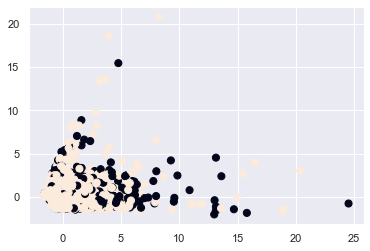

In [69]:
plt.scatter(result_df['x'], result_df['y'], c=y_cluster, s=50)

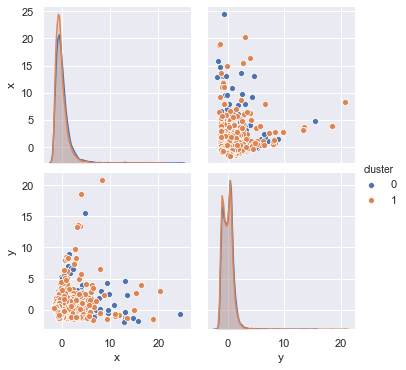

In [70]:
sns.pairplot( result_df, hue='cluster')

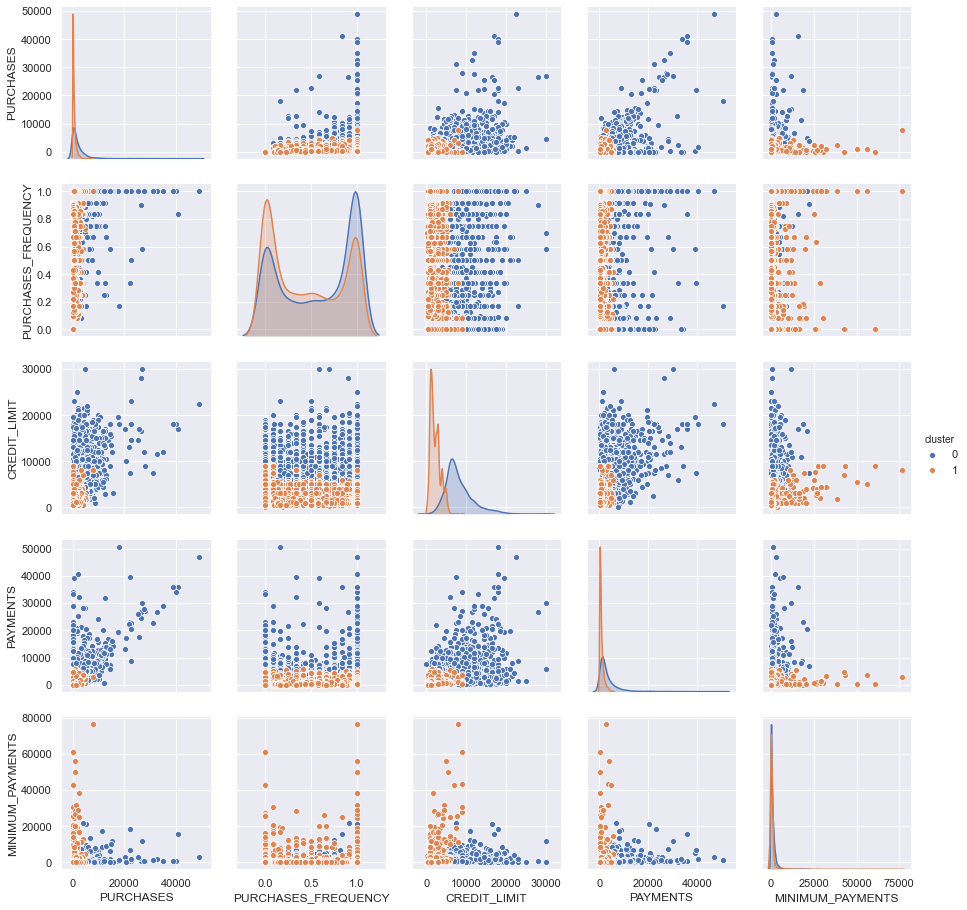

In [71]:
df['cluster'] = y_cluster
cols=['PURCHASES', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'cluster']
sns.pairplot( df[cols], hue='cluster')

# Insight & Analysis

After seeing the visualizations above, we can take a few insights from the clustering process.

There are two major cluster that behave differently, i'll name them as the color which are orange and blue.

* The __blue__ are the __high limit and active-spender people__. They have bigger credit limit that means they have a big balance from the start. They are the active-spender, they do much purchase and payments. They also more frequent to do purchases.

* The __orange__ are the __medium limit people__. They have smaller credit limit than the blue people. The orange people also purchase and do payments less than the blue people. But the interesting part, they tend to make __bigger minimum payment__ than the blue people even though their credit limit is smaller.

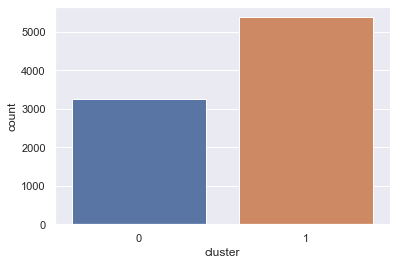

In [72]:
ax = sns.countplot(x="cluster",data=df)

We can see from the histogram above, the majority of CC users are the orange people, the ones who have medium credit limit (and balance). But the ratio is not very different. This can be a consideration of the CC company to make decision, making policy, making promo, etc to be based on these two kind of CC users.